In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.0MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Chennai Super Kings','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Chennai Super Kings','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


Finally , We have got a complete dataset for all the matches of RR VS SRH

**Let's do Q1 now**

MI Wins - 17
CSK Wins - 11


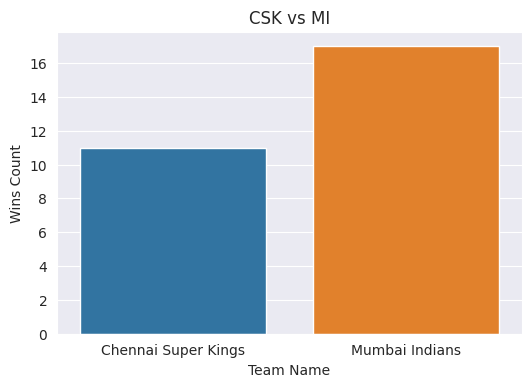

In [12]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('CSK vs MI')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('CSK Wins -',B)

plt.show()


Let's mark MI considering overall analysis

**Let's do Q2 now**

**Average Wickets lost by RCB in 5-20 overs**

In [29]:
data_n = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_n = data_n.loc[data.batsman.isin(['Q de Kock'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
97960,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,1,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
97961,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,2,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,3,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,0,0,0,0,Q de Kock,caught,M Vijay
114358,483,1,Delhi Daredevils,Chennai Super Kings,1,1,Q de Kock,M Vijay,BW Hilfenhaus,0,0,0,4,0,0,0,4,4,NaN,NaN,NaN
114359,483,1,Delhi Daredevils,Chennai Super Kings,1,2,Q de Kock,M Vijay,BW Hilfenhaus,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178851,11415,1,Mumbai Indians,Chennai Super Kings,4,3,Q de Kock,RG Sharma,Harbhajan Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178855,11415,1,Mumbai Indians,Chennai Super Kings,5,1,Q de Kock,RG Sharma,SN Thakur,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178857,11415,1,Mumbai Indians,Chennai Super Kings,5,3,Q de Kock,RG Sharma,SN Thakur,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178858,11415,1,Mumbai Indians,Chennai Super Kings,5,4,Q de Kock,RG Sharma,SN Thakur,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [58]:
data_n.match_id.nunique() # Matches of De Kock v CSK

8

In [30]:
data_dk = data_n.groupby('match_id').apply(lambda data_n:np.sum(data_n['batsman_runs'])).reset_index(name='Runs/Match')
data_dk

,match_id,Runs/Match
0,414,4
1,483,24
2,565,3
3,7917,53
4,11151,5
5,11335,16
6,11412,11
7,11415,30


In [63]:
data_dk2= data_n.groupby('match_id').apply(lambda data_n:np.sum(data_n.over.value_counts())).reset_index(name='Ball faced')
data_dk2

,match_id,Ball faced
0,414,3
1,483,17
2,565,7
3,7917,37
4,11151,7
5,11335,10
6,11412,13
7,11415,18


In [91]:
data_dk4 = data_n.groupby(['match_id','batsman_runs']).apply(lambda data_n: np.sum(data_n.over.value_counts().sum() <10))
data_dk4 # Stats of first 10 runs scored by De Kock

match_id  batsman_runs
414       0               1
          4               1
483       0               0
          4               1
          6               1
565       0               1
          1               1
7917      0               0
          1               0
          2               1
          4               1
          6               1
11151     0               1
          1               1
          4               1
11335     0               1
          1               1
          3               1
          4               1
          6               1
11412     0               0
          3               1
          4               1
11415     0               1
          1               1
          6               1
dtype: int64

Finally we have got our desired dataset in which De Kock has scored how much boundaries in first 10 balls

Let's count them -

In [92]:
sum = (4+4+6+4+6+4+4+6+4+6)
print(sum)

48


In [93]:
print(48/8) # Average Boundary runs in first 10 balls faced by De Kock

6.0


Let's mark less than 10 considering our analysis

**For Q3, Let's find the dot ball ratio of MI bowlers**

In [143]:
data_m = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_m = data_m.loc[data.batting_team.isin(['Chennai Super Kings'])]

In [114]:
data_m.bowler.value_counts()

SL Malinga           521
Harbhajan Singh      475
KA Pollard           254
JJ Bumrah            191
MJ McClenaghan       144
PP Ojha              141
HH Pandya            140
DJ Bravo             125
KH Pandya             99
Z Khan                99
DS Kulkarni           98
MG Johnson            96
MM Patel              93
RD Chahar             85
R Vinay Kumar         74
A Nehra               52
RP Singh              49
J Suchith             49
P Kumar               48
R McLaren             46
M Markande            43
SM Pollock            43
P Suyal               40
AN Ahmed              40
CJ Anderson           37
CRD Fernando          26
M de Lange            26
J Behrendorff         25
RR Raje               25
ST Jayasuriya         24
JEC Franklin          24
Mustafizur Rahman     23
C Nanda               20
J Yadav               19
MA Khote              18
DR Smith              18
A Roy                 15
JP Duminy             12
RJ Peterson           12
R Sathish             12


In [131]:
data_m = data_m.loc[data.bowler.isin(['JJ Bumrah'])]

In [132]:
data_m.total_runs.value_counts() # To find Dot balls of Bumrah

0    75
1    66
4    22
2    21
6     6
8     1
Name: total_runs, dtype: int64

In [134]:
data_m.over.value_counts().sum() # Total balls by Bumrah

191

In [135]:
np.round(75/191,2) # Dot ball / Total ball ratio of Bumrah 

0.39

In [144]:
data_rc = data_m.loc[data.bowler.isin(['RD Chahar'])]

In [147]:
data_rc.total_runs.value_counts() # To find Dot balls of RD Chahar

1    41
0    38
4     4
2     2
Name: total_runs, dtype: int64

In [145]:
data_rc.over.value_counts().sum()

85

In [152]:
np.round(38/85,2) # Dot ball Ratio of RD Chahar

0.45

After considering dot/total balls ratio Bumrah has more fine record than Chahar

Let's mark Bumrah Considering our analysis

**Let's do Q4**

**Let's find overs in which 4 and 6 are together hit**

In [165]:
data_s = data.loc[data.bowling_team.isin(['Chennai Super Kings','Mumbai Indians'])]
data_s = data_s.loc[data.batting_team.isin(['Chennai Super Kings','Mumbai Indians'])]
data_s = data_s.loc[data.total_runs.isin(['4','6'])]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15490,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
15496,67,1,Chennai Super Kings,Mumbai Indians,2,4,PA Patel,ML Hayden,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
15498,67,1,Chennai Super Kings,Mumbai Indians,2,6,PA Patel,ML Hayden,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
15500,67,1,Chennai Super Kings,Mumbai Indians,3,2,ML Hayden,PA Patel,SM Pollock,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
15501,67,1,Chennai Super Kings,Mumbai Indians,3,3,ML Hayden,PA Patel,SM Pollock,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
179061,11415,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,DJ Bravo,KH Pandya,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
179062,11415,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,DJ Bravo,KH Pandya,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [177]:
data_s.groupby(['match_id','total_runs']).apply(lambda data_s: np.unique(data_s.over.value_counts()))

match_id  total_runs
67        4             [1, 2, 3, 4, 5]
          6                      [1, 2]
96        4                [1, 2, 3, 4]
          6                   [1, 2, 3]
118       4                [1, 2, 3, 4]
          6                   [1, 2, 4]
162       4                   [1, 2, 3]
          6                      [1, 2]
194       4                [1, 2, 3, 5]
          6                   [1, 2, 3]
211       4                   [1, 2, 3]
          6                      [1, 2]
234       4                [1, 2, 3, 4]
          6                      [1, 2]
257       4                [1, 2, 3, 5]
          6                      [1, 2]
308       4                   [1, 2, 3]
          6                         [1]
355       4                [1, 2, 3, 4]
          6                   [1, 2, 4]
379       4                [1, 2, 3, 4]
          6                   [1, 2, 3]
386       4                   [1, 2, 3]
          6                      [1, 2]
430       4        

After observing from above there mostly 3-4 overs on an average where both 4 and 6 has been scored.

**Let's do Q5 now**

**Let's compute BLS**

Out of these options let's find BLS for Bumrah,Rahul Chahar and Deepak Chahar as they more prominent fighters for it.

Using my domain knowledge here.

In [199]:
data_cm = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_cm = data_cm.loc[data.batting_team.isin(['Mumbai Indians'])]
data_cm

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15613,67,2,Mumbai Indians,Chennai Super Kings,1,1,L Ronchi,ST Jayasuriya,JDP Oram,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
15614,67,2,Mumbai Indians,Chennai Super Kings,1,2,L Ronchi,ST Jayasuriya,JDP Oram,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
15615,67,2,Mumbai Indians,Chennai Super Kings,1,3,L Ronchi,ST Jayasuriya,JDP Oram,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
15616,67,2,Mumbai Indians,Chennai Super Kings,1,4,ST Jayasuriya,L Ronchi,JDP Oram,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
15617,67,2,Mumbai Indians,Chennai Super Kings,1,5,ST Jayasuriya,L Ronchi,JDP Oram,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,0,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [200]:
data_cm2 = data_cm.loc[data.bowler.isin(['DL Chahar'])]

In [201]:
data_cm2.player_dismissed.value_counts().sum()

7

In [202]:
data_cm2.total_runs.value_counts()

0    60
4    22
1    22
2    12
6     4
3     1
Name: total_runs, dtype: int64

In [203]:
data_cm2.over.value_counts().sum()

121

In [204]:
data_cm3 = data_cm.loc[data.batsman.isin(['DL Chahar'])]

In [205]:
data_cm3.batsman_runs.value_counts()

Series([], Name: batsman_runs, dtype: int64)

In [192]:
BLS_D_Chahar = ((7 +60)-(112/1)/121) # Using 1 as division by 0 will cause error
print(BLS_D_Chahar)

66.07438016528926


In [206]:
data_cm = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_cm = data_cm.loc[data.batting_team.isin(['Chennai Super Kings'])]

In [207]:
data_cm2 = data_cm.loc[data.bowler.isin(['JJ Bumrah'])]

In [208]:
data_cm2.player_dismissed.value_counts().sum()

5

In [209]:
data_cm3 = data_cm.loc[data.batsman.isin(['JJ Bumrah'])]

In [211]:
data_cm3.batsman_runs.sum()

0

In [215]:
BLS_Bumrah = ((5+75)-(124/1)/171) # Using 1 as division by 0 will cause error
print(BLS_Bumrah)

79.27485380116958


In [216]:
data_cm = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_cm = data_cm.loc[data.batting_team.isin(['Chennai Super Kings'])]

In [217]:
data_cm2 = data_cm.loc[data.bowler.isin(['RD Chahar'])]

In [219]:
data_cm2.player_dismissed.value_counts().sum()

3

In [221]:
BLS_R_Chahar = ((3+38)-(16/1)/85)
print(BLS_R_Chahar)

40.811764705882354


From our analysis we got highest BLS score for Bumrah with 79.27.

Let's mark it considering our analysis.

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

